<a href="https://colab.research.google.com/github/vishalkumarsingh999/NLP/blob/main/fake_news_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fake News Detection

First import all the libraries/packages which are necessary. To analyse the given dataset

In Python, there is no data type called array. In order to implement the data type of array with python, numpy and scipy are the essential libraries for analyzing and calculating data. They are all open source libraries. Numpy is mainly used for the matrix calculation. scipy is developed based on numpy and it is mainly used for scientific research. Mathplotlib is a famous library for plotting in Python. It provides a series of API and it is suitable for making interactive mapping. In this case, we need to use it to find the best result visually.

By using them in Python programming, they can be used with two simple commands:

## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string
from wordcloud import WordCloud

## Importing Dataset

In [ ]:
df_fake = pd.read_csv("Fake.csv")
df_true = pd.read_csv("True.csv")

Data Cleaning means the process of identifying the incorrect, incomplete, inaccurate, irrelevant or missing part of the data and then modifying, replacing or deleting them according to the necessity. Data cleaning is considered a foundational element of the basic data science. 

Data is the most valuable thing for Analytics and Machine learning. In computing or Business data is needed everywhere. When it comes to the real world data, it is not improbable that data may contain incomplete, inconsistent or missing values. If the data is corrupted then it may hinder the process or provide inaccurate results.

In [ ]:
df_fake.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
df_true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


## Inserting a column "class" as target feature

In [ ]:
df_fake["class"] = 0
df_true["class"] = 1

In [ ]:
df_fake.shape, df_true.shape

((23481, 5), (21417, 5))

In [ ]:
# Removing last 10 rows for manual testing
df_fake_manual_testing = df_fake.tail(10)
for i in range(23480,23470,-1):
    df_fake.drop([i], axis = 0, inplace = True)
    
    
df_true_manual_testing = df_true.tail(10)
for i in range(21416,21406,-1):
    df_true.drop([i], axis = 0, inplace = True)

In [ ]:
df_fake.shape, df_true.shape

((23471, 5), (21407, 5))

# Data Exploration

In [ ]:
df_fake_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [ ]:
df_true_manual_testing.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [ ]:
df_manual_testing = pd.concat([df_fake_manual_testing,df_true_manual_testing], axis = 0)
df_manual_testing.to_csv("manual_testing.csv")

## Merging True and Fake Dataframes

In [ ]:
df_merge = pd.concat([df_fake, df_true], axis =0 )
df_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [ ]:
df_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

## Removing columns which are not required

In [ ]:
df = df_merge.drop(["title", "subject","date"], axis = 1)

In [ ]:
df.isnull().sum()

text     0
class    0
dtype: int64

# Data Visualisation

A Target column is added and the data are merged & randomly mixed into a single dataframe known as data.
Let’s see if the dataset is well balanced.

21407 23471


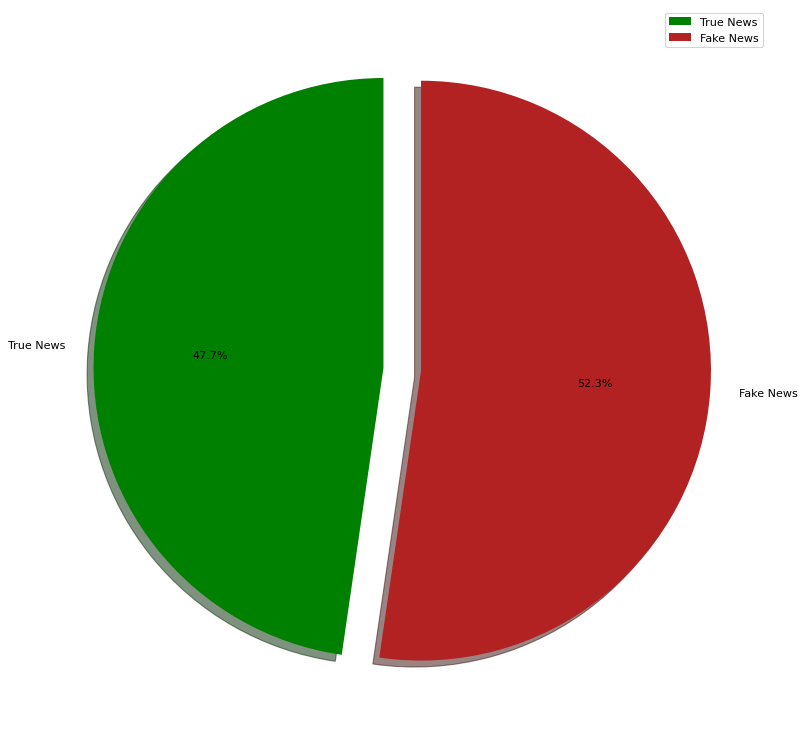

In [ ]:
true_count=df_true.shape[0]
fake_count=df_fake.shape[0]
print(true_count,fake_count)
plt.figure(figsize=(12, 12), dpi=80)
plt.pie(np.array([true_count,fake_count]),explode=[0.08,0.05],colors=['green','firebrick'],startangle=90,shadow=True,labels=['True News','Fake News'],autopct='%3.1f%%')
plt.legend()
plt.show()

## Random Shuffling the dataframe

In [ ]:
df = df.sample(frac = 1)

In [ ]:
df.head()

,text,class
4501,UNITED NATIONS (Reuters) - The State Departmen...,1
9081,HOUSTON (Reuters) - A Republican-led congressi...,1
19174,In 2013 Dr Kermit Gosnell was convicted of kil...,0
6795,For more than seven years now the right-wing l...,0
19216,PARIS (Reuters) - Fewer French voters are diss...,1


In [ ]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [ ]:
df.columns

Index(['text', 'class'], dtype='object')

In [ ]:
df.head()

,text,class
0,UNITED NATIONS (Reuters) - The State Departmen...,1
1,HOUSTON (Reuters) - A Republican-led congressi...,1
2,In 2013 Dr Kermit Gosnell was convicted of kil...,0
3,For more than seven years now the right-wing l...,0
4,PARIS (Reuters) - Fewer French voters are diss...,1


## Creating a function to process the texts

In [ ]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [ ]:
df["text"] = df["text"].apply(wordopt)

## Defining dependent and independent variables

In [ ]:
x = df["text"]
y = df["class"]

## Splitting Training and Testing

Split the dataset into a training set and a testing set

Advantages :

•	By splitting the dataset pseudo-randomly into a two separate sets, we can train using one set and test using another.

•	This ensures that we won't use the same observations in both sets.

•	More flexible and faster than creating a model using all of the dataset for training.


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

# Plotting the histogram of the number of words and tokenizing the text:

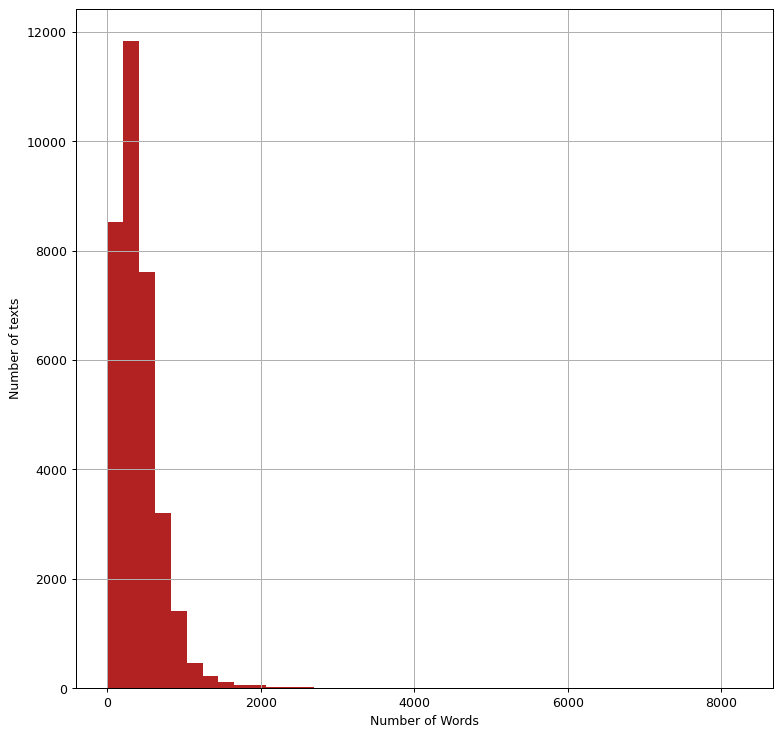

In [ ]:
seq_len = [len(i.split()) for i in x_train]
plt.figure(figsize=(10,10),dpi=90)
pd.Series(seq_len).hist(bins = 40,color='firebrick')
plt.xlabel('Number of Words')
plt.ylabel('Number of texts')
plt.show()

# Convert text to vectors
There are three most used techniques to convert text into numeric feature vectors namely Bag of Words, tf-idf vectorization and word embedding. We will discuss the first two in this article along with python code and will have a separate article for word embedding.


## Bag of Words (BoW) Vectorization
Before understanding BoW Vectorization, below are the few terms that you need to understand.

• Document: a document is a single text data point e.g. a product review 

• Corpus: it a collection of all the documents

• Feature: every unique word in the corpus is a feature

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

# Logistic Regression

Logistic regression, despite its name, is a classification model rather than regression model. Logistic regression is a simple and more efficient method for binary and linear classification problems. It is a classification model, which is very easy to realize and achieves very good performance with linearly separable classes. It is an extensively employed algorithm for classification in industry. The logistic regression model, like the Adaline and perceptron, is a statistical method for binary classification that can be generalized to multiclass classification. Scikit-learn has a highly optimized version of logistic regression implementation, which supports multiclass classification task.

Logistic regression is a statistical method for predicting binary classes. The outcome or target variable is dichotomous in nature. 
Dichotomous means there are only two possible classes. For example, it can be used for cancer detection problems. 
It computes the probability of an event occurrence.
It is a special case of linear regression where the target variable is categorical in nature.
It uses a log of odds as the dependent variable. 
Logistic Regression predicts the probability of occurrence of a binary event utilizing a logit function.

Linear Regression Equation:
$$ y = \beta + W_1 X_1 + W_2 X_2 + W_3 X_3 + ...$$
### Activation Function
Activation functions are really important for a Artificial Neural Network to learn and make sense of something really complicated and Non-linear complex functional mappings between the inputs and response variable.

Here we are using the **Sigmoid** activation function. The sigmoid activation function is defined as 

$$ y=\frac{1}{1+e^{-z}} $$
### Cost Function
We will first begin with the cost function that will compute the cost difference between the actual and the predicted values. The cost function also called as the loss function used in the tutorial is given as

$$ J = y\log{\hat{y}} + (1-y)\log{(1 - \hat{y})}$$

This cost of loss function is also known as Binary Cross-Entropy

### Gradient Descent
Gradient descent is an optimization algorithm used to find the values of parameters (coefficients) of a function (f) that minimizes a cost function (cost). Gradient descent is best used when the parameters cannot be calculated analytically (e.g. using linear algebra) and must be searched for by an optimization algorithm.

$$ \Delta = \frac{1}{m}X\sigma{(y)}-{y} $$
Where $$ \sigma = Sigmoid = \frac{1}{1+e^{-z}} $$


In [ ]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

## Predicting result and testing accuracy and classification for logistic regression

In [ ]:
pred_lr=LR.predict(xv_test)

In [ ]:
LR.score(xv_test, y_test)

0.9859180035650624

In [ ]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5924
           1       0.98      0.99      0.99      5296

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



## Passive Aggressive Classifiers

### Text Classification with Passive-Aggressive Algorithms

*Passive-Aggressive algorithms* (PA),
are a family of margin based online learning algorithms with regularization and no learning rate.
In this notebook, we seek to evaluate PA classifiers on
multi-class classification data. We estimate multiple binary PA classifiers in a one-versus-all (OvA) setting.

---

Suppose $X = \mathbb{R}^n$ is a set of instances and
$Y = \{c_1, c_2, \dots, c_k\}$ is a set of labels. Our classification function is defined by

$$ a(x) = sign(\langle w, x \rangle) \text{, } w \in \mathbb{R}^n $$

The task is to learn the weight vector $w$ updating it incrementally by *hinge-loss*:

$$
l(w; (x, y)) =
\begin{cases}
    0, & \text{if } y \langle w, x \rangle \geq 1; \\
    1 - y \langle w, x \rangle, & \text{otherwise.}
\end{cases}
$$

The update rule comes in two possible forms.

**PA-I**
$$
w_{t+1} = argmin_{w}\frac{1}{2}\| w - w_t \|^2 + C\xi \\ \text{ s.t. } \\
l(w; (x_t, y_t)) \leq \xi \text{ and } \xi \geq 0.
$$

**PA-II**
$$
w_{t+1} = argmin_{w}\frac{1}{2}\| w - w_t \|^2 + C\xi^2 \\ \text{ s.t. } \\
l(w; (x_t, y_t)) \leq \xi.
$$

where $t$ is the iteration round, $C$ is the regularization term, and $\xi$ is the slack term on the objective.

The updates share the form

$$w_{t+1} = w_t + \tau_t y_t x_t; $$
$$
\tau_t = \min \left( C, \frac{l_t}{\| x_t \|^2} \right) \text{ (PA-I),} \\
\tau_t = \frac{l_t}{\| x \|^2 + \frac{1}{2C}} \text{ (PA-II).}
$$

---

we use scikit-learn's
[`PassiveAggressiveClassifier`]

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier


PA = PassiveAggressiveClassifier()
PA.fit(xv_train, y_train)

PassiveAggressiveClassifier()

## Predicting result and testing accuracy and classification for PassiveAggressiveClassifier

In [ ]:
pred_dt = PA.predict(xv_test)

In [ ]:
PA.score(xv_test, y_test)

0.9942067736185384

In [ ]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5924
           1       0.99      0.99      0.99      5296

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



# Conclusions 

<font size="4.01">We are in the fantastic era of Machine Learning. One of the great thing about it is that while it is extremely difficult to train a state of art neural network, it is way easier and faster to use a pretrained neural network, fine tune it and obtain state of art results on your dataset.The task of classifying news manually requires in-depth knowledge of the domain and expertise to identify anomalies in the text. In this research, we discussed the problem of classifying fake news articles using machine learning models and ensemble techniques. The data we used in our work is collected from the World Wide Web and contains news articles from various domains to cover most of the news rather than specifically classifying political news. The primary aim of the research is to identify patterns in text that differentiate fake articles from true news. We extracted different textual features from the articles using an LIWC tool and used the feature set as an input to the models. The learning models were trained and parameter-tuned to obtain optimal accuracy. Some models have achieved comparatively higher accuracy than others. We used multiple performance metrics to compare the results for each algorithm. The ensemble learners have shown an overall better score on all performance metrics as compared to the individual learners.

Fake news detection has many open issues that require attention of researchers. For instance, in order to reduce the spread of fake news, identifying key elements involved in the spread of news is an important step. Graph theory and machine learning techniques can be employed to identify the key sources involved in spread of fake news. Likewise, real time fake news identification in videos can be another possible future direction.</font>